# How to Improve the Testing Efficiency in Car Manufactories

<img src="https://images.unsplash.com/photo-1567789884554-0b844b597180?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80" align = "right" style = "border:20px solid white">   

<h3> Situation:</h3>  

 * Each manufactured automobile needs to be tested to ensure the safety and reliability.  
 * Testing is a time-consuming process.
 * Different cars have different configurations/features.
 
<h3> Task:</h3> 
 
 * Optimizing the speed of testing system using a algorithmic approach 

<h3> Action:</h3>

 * Using regression models to identify key features that affect the testing time.  

<h3> Results:</h3> 

 * To reduce the testing time without compromising the reliability and safety of newly manufactured cars.


<h2>Project Workflow</h2>

1. Data exploration
2. Data cleaning
3. Model comparison
4. Important Features
5. Model optimization
6. Takeaway

## 1. Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print('row, column:')
print(data.shape)

row, column:
(4209, 378)


In [5]:
print('missing entry: %.f'%data.isnull().sum().max())

missing entry: 0


## 2. Data cleaning
### 2.1. Categorical features ---> numberical 

In [6]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [7]:
for f in data.columns:
    if data[f].dtype=='object': 
        le = preprocessing.LabelEncoder()
        le.fit(list(data[f].values))
        data[f] = le.transform(list(data[f].values))

In [8]:
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(len(data)*0.8)

3367.2000000000003


In [10]:
# shuffle
data_r = data.sample(frac=1, random_state=13)
# 80% for training and 20% for testing.
train = data_r[:3367]
test = data_r[3368:]

In [11]:
train_c = train.set_index('ID')

### 2.2. Correlation

Wall time: 2.77 s


<AxesSubplot:>

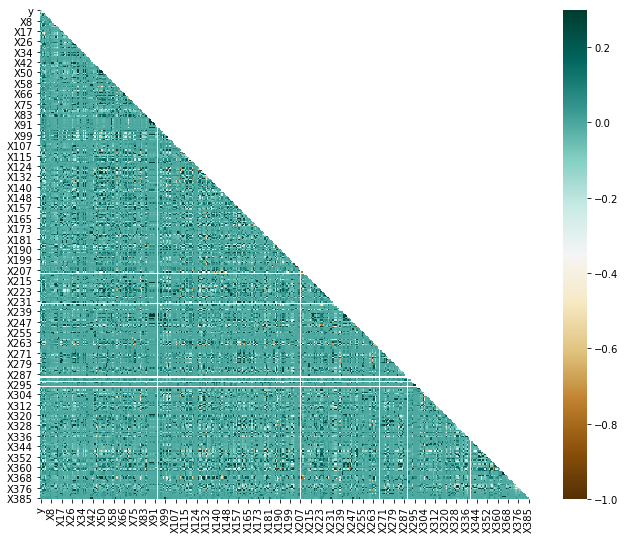

In [12]:
%%time
correlation_matrix = train_c.corr()
plt.figure(figsize=(12,9))
matrix = np.triu(train_c.corr())
sns.heatmap(correlation_matrix, mask = matrix, vmax=.3, square=True, cmap= 'BrBG')

### 2.3. Data normalization

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_train = train.drop('y', 1)
y_train = train[['y']]
X_test = test.drop('y', 1)
y_test = test[['y']]

In [15]:
# normalize data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
sc1 = StandardScaler()
sc1.fit(y_train)
y_train_std = sc1.transform(y_train)
y_test_std = sc1.transform(y_test)

## 3. Model 

In [16]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
# Dummy
DR = DummyRegressor(strategy='mean')
DR.fit(X_train_std, y_train)
DR_pred = DR.predict(X_test_std)

Linear Regression cannot converge

In [19]:
# Lasso
LS = Lasso(random_state=13)
LS.fit(X_train_std, y_train)
LS_pred = LS.predict(X_test_std)

In [20]:
# Ridge
RG = Ridge(random_state=13)
RG.fit(X_train_std, y_train)
RG_pred = RG.predict(X_test_std)

In [21]:
# Support Vector Machine
SV = SVR(kernel='rbf')
SV.fit(X_train_std,y_train)
SV_pred=SV.predict(X_test_std)

In [22]:
#XGB
XG = XGBRegressor(random_state=13,objective ='reg:squarederror')
XG.fit(X_train_std, y_train)
XG_pred = XG.predict(X_test_std)

In [23]:
# Random Forest
RF = RandomForestRegressor(random_state=13)
RF.fit(X_train_std, y_train)
RF_pred = RF.predict(X_test_std)

In [25]:
score1 = metrics.r2_score(y_test, DR_pred)
score3 = metrics.r2_score(y_test, LS_pred)
score4 = metrics.r2_score(y_test, RG_pred)
score5 = metrics.r2_score(y_test, SV_pred)
score6 = metrics.r2_score(y_test,XG_pred)
score7 = metrics.r2_score(y_test, RF_pred)
print ('R2 score')
print (' dummy:        %.5f' % score1 )
print (' Lasso:        %.5f' % score3 )
print (' Ridge:        %.5f' % score4 )
print (' SVM:          %.5f' % score5 )
print (' XGB:          %.5f' % score6 )
print (' RandomForest: %.5f' % score7 )

R2 score
 dummy:        -0.00399
 Lasso:        0.55285
 Ridge:        0.59483
 SVM:          0.47698
 XGB:          0.56774
 RandomForest: 0.56270


#### Frontrunner: Ridge and Random Forest

## 4. Important Features

#### Which feature matters?
- Use feature importance to tell.

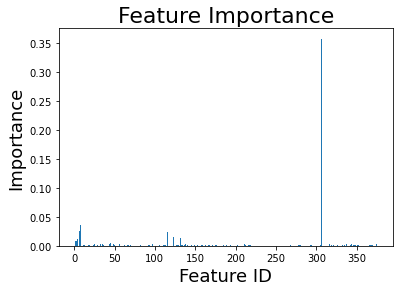

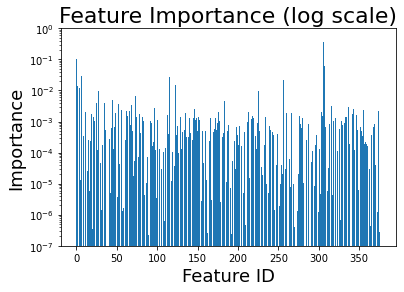

In [26]:
# get importance
importance = RF.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance', fontsize=22)
plt.xlabel('Feature ID', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.show()

plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance (log scale)', fontsize=22)
plt.xlabel('Feature ID', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.yscale('log')
plt.ylim(1e-7,1)
plt.show()

In [56]:
feature = [ ]
for i,v in enumerate(importance):
    if v >= 0.005:
        print('Feature: %0d, Score: %.5f' % (i,v))
        feature.append(i)

Feature: 0, Score: 0.10270
Feature: 1, Score: 0.01364
Feature: 2, Score: 0.00906
Feature: 3, Score: 0.00776
Feature: 4, Score: 0.01198
Feature: 6, Score: 0.02990
Feature: 7, Score: 0.02638
Feature: 8, Score: 0.03555
Feature: 27, Score: 0.00971
Feature: 73, Score: 0.00676
Feature: 115, Score: 0.02738
Feature: 116, Score: 0.02338
Feature: 123, Score: 0.01471
Feature: 132, Score: 0.01284
Feature: 225, Score: 0.00946
Feature: 256, Score: 0.02177
Feature: 272, Score: 0.00515
Feature: 306, Score: 0.35769
Feature: 307, Score: 0.06045


In [57]:
X_train = train.drop('y', axis=1)
X_train_r = X_train.iloc[:,feature]
X_test = test.drop('y', axis=1)
X_test_r = X_test.iloc[:,feature]

y_train = train['y'].values
y_test = test['y'].values

In [58]:
# Standarize data
sc2 = StandardScaler()
sc2.fit(X_train_r)
X_train_std2 = sc2.transform(X_train_r)
X_test_std2 = sc2.transform(X_test_r)

## 5. Model Optimization

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [60]:
X_train_std2.shape

(3367, 19)

In [61]:
# Random Forest
RF1 = RandomForestRegressor(random_state=13)
RF1.fit(X_train_std2, y_train)
RF_pred1 = RF1.predict(X_test_std2)

# Ridge
RG1 = Ridge(random_state=13)
RG1.fit(X_train_std2, y_train)
RG_pred1 = RG1.predict(X_test_std2)

#XGB
XG1 = XGBRegressor(random_state=13,objective ='reg:squarederror')
XG1.fit(X_train_std2, y_train)
XG_pred1 = XG1.predict(X_test_std2)

In [71]:
score7 = metrics.r2_score(y_test, RF_pred)
score4 = metrics.r2_score(y_test, RG_pred)
score6 = metrics.r2_score(y_test,XG_pred)

score8 = metrics.r2_score(y_test, RF_pred1)
score9 = metrics.r2_score(y_test, RG_pred1)
score10 = metrics.r2_score(y_test, XG_pred1)
print ('R2 score')
print ('--- before feature selection')
print (' RandomForest: %.5f' % score7 )
print (' Ridge:        %.5f' % score4 )
print (' XGB:          %.5f' % score6 )

print ('--- after feature selection')
print (' RandomForest: %.5f' %score8)
print (' Ridge:        %.5f' % score9)
print (' XGB:          %.5f' % score10)

R2 score
--- before feature selection
 RandomForest: 0.56270
 Ridge:        0.59483
 XGB:          0.56774
--- after feature selection
 RandomForest: 0.57152
 Ridge:        0.60468
 XGB:          0.56691


### 5.1. Hyperparmeter Tuning (e.g. Random Forest)
- Grid search
- Cross-validation (KFold)

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [73]:
# To optimize random forests
n_estimators = [100, 500, 1000, 1500, 2000]
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

In [74]:
%%time
# define grid search
grid = dict(n_estimators=n_estimators, max_depth=max_depth)
cv = KFold(n_splits=10, random_state=13)
grid_search = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=cv, scoring='r2',error_score=0)
grid_result = grid_search.fit(X_train_std2, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.560131 using {'max_depth': 3, 'n_estimators': 500}
0.361084 (0.058634) with: {'max_depth': 1, 'n_estimators': 100}
0.361047 (0.058654) with: {'max_depth': 1, 'n_estimators': 500}
0.361073 (0.058657) with: {'max_depth': 1, 'n_estimators': 1000}
0.361064 (0.058661) with: {'max_depth': 1, 'n_estimators': 1500}
0.361067 (0.058656) with: {'max_depth': 1, 'n_estimators': 2000}
0.520200 (0.077174) with: {'max_depth': 2, 'n_estimators': 100}
0.520048 (0.076119) with: {'max_depth': 2, 'n_estimators': 500}
0.520435 (0.076080) with: {'max_depth': 2, 'n_estimators': 1000}
0.520329 (0.075924) with: {'max_depth': 2, 'n_estimators': 1500}
0.520269 (0.075748) with: {'max_depth': 2, 'n_estimators': 2000}
0.559918 (0.078362) with: {'max_depth': 3, 'n_estimators': 100}
0.560131 (0.078114) with: {'max_depth': 3, 'n_estimators': 500}
0.560117 (0.078039) with: {'max_depth': 3, 'n_estimators': 1000}
0.560108 (0.078058) with: {'max_depth': 3, 'n_estimators': 1500}
0.560058 (0.078026) with: {'max_depth

### 5.2. Visualizing hyperparameters tuning 

In [75]:
from matplotlib import cm

In [76]:
opt=pd.concat([pd.DataFrame(grid_result.cv_results_['params']),
               pd.DataFrame(grid_result.cv_results_['mean_test_score'], 
                            columns=["r2"])],axis=1)

In [77]:
X1 = opt['max_depth']
X2 = opt['n_estimators']
Y = opt['r2']

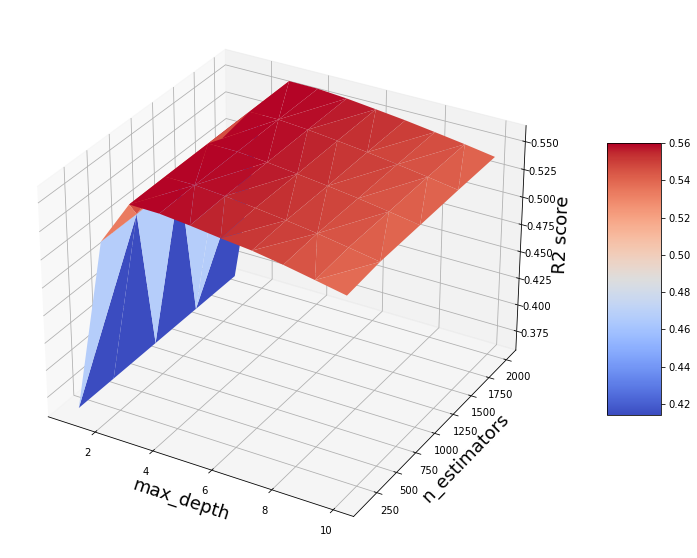

In [78]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf= ax.plot_trisurf(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, shade=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('max_depth', fontsize=18)
ax.set_ylabel('n_estimators', fontsize=18)
ax.set_zlabel('R2 score', fontsize=18)
plt.show()

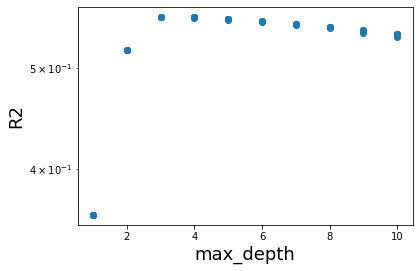

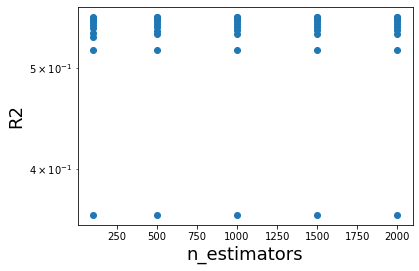

In [79]:
fig, ax = plt.subplots()
ax.scatter(X1, Y)
ax.set_xlabel('max_depth', fontsize=18)
ax.set_ylabel('R2', fontsize=18)
plt.yscale('log')
plt.show()


fig, ax = plt.subplots()
ax.scatter(X2, Y)
ax.set_xlabel('n_estimators', fontsize=18)
ax.set_ylabel('R2', fontsize=18)
plt.yscale('log')
plt.show()

In [80]:
# Optimized random forest
RF2 = RandomForestRegressor(random_state=13,max_depth=3,n_estimators=500)
RF2.fit(X_train_std2, y_train)
RF2_pred = RF2.predict(X_test_std2)

In [81]:
score_op = metrics.r2_score(y_test,RF2_pred)
print ('R2 score of Random Forest')
print (' Original: %.5f' % score7)
print (' Features: %.5f' % score8)
print (' Optimized:%.5f' % score_op)

R2 score of Random Forest
 Original: 0.56270
 Features: 0.57152
 Optimized:0.61643


## 6. Takeaway
This project shows:
- Key features can be identified by feature importance.
- Effort should be prioritized on optimizing those identified features as follows.

In [118]:
print('Key features:')
col=[]
for i in X_train_r.columns:
    print(i)

Key features:
ID
X0
X1
X2
X3
X5
X6
X8
X29
X76
X118
X119
X127
X136
X232
X263
X279
X314
X315


## Reference
https://www.kaggle.com/c/mercedes-benz-greener-manufacturing

## Image Courtesy
https://unsplash.com/photos/jHZ70nRk7Ns